In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ds = pd.read_csv('/content/drive/MyDrive/full_doc_train.csv')

In [4]:
pd.set_option('display.max_colwidth', 150)
ds

,label,text,is_valid
0,opinion,"উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি...",False
1,opinion,"জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপ-সংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে। তাঁর সফর, ...",False
2,opinion,"একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখা চিঠি। অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম: ‘প্রিয় আব্বু, আমি জানি না এ চিঠি কোনো দিন তোমার কাছে...",False
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি আসি করছে। আমরা কয়েকজন এসেছি গ্রামের বঞ্চিত-অবহেলিত মেয়েদের একটি স্কুল দেখতে।খুলনা শহর থেকে সামান্য দ...,False
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘানઘ কমગকতગােদর পেদাਭিত োদওয়ার পদেਉেপ পચাথিমক িশਉা অিধদਮেরর সহকাির পચিশਉকেদর (এআই) মেধઘ োਉােভর সৃিੈ হেয়...,False
...,...,...,...
76713,entertainment,ফারাহ খান পরিচালিত শাহরুখ খান-দীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত ২৪ অক্টোবর। এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে ৩০...,False
76714,entertainment,রাধারমণের ১০০তম তিরোধান তিথি চলছে। সেটা মনে রেখেই এই অনুষ্ঠান। এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে। শিল্পকলা একাডেমী...,False
76715,entertainment,"‘আমার আশপাশের সবাই চাইছেন এখনই বিয়ে করে থিতু হই আমি, কিন্তু কবে থিতু হব এ বিষয়ে আমি এখনো জানি না। অবশ্য থিতু হওয়ার জন্য নিজের ওপর কোনো রকম চাপ সৃষ...",False
76716,entertainment,"টাইমস অফ ইন্ডিয়া জানিয়েছে, ছোট বোন কারিনা কাপুর খানের চোখে বরাবরই ভালো নাচিয়েদের তালিকার শীর্ষে ছিলেন কারিশমা। তবে তেমনভাবে আলোচিত কোনো আইটেম গানে...",False


In [5]:
da = ds.drop(['is_valid'], axis = 1)
da

,label,text
0,opinion,"উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি..."
1,opinion,"জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপ-সংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে। তাঁর সফর, ..."
2,opinion,"একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখা চিঠি। অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম: ‘প্রিয় আব্বু, আমি জানি না এ চিঠি কোনো দিন তোমার কাছে..."
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি আসি করছে। আমরা কয়েকজন এসেছি গ্রামের বঞ্চিত-অবহেলিত মেয়েদের একটি স্কুল দেখতে।খুলনা শহর থেকে সামান্য দ...
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘানઘ কমગকতગােদর পেদাਭিত োদওয়ার পদেਉেপ পચাথিমক িশਉা অিধদਮেরর সহকাির পચিশਉকেদর (এআই) মেধઘ োਉােভর সৃিੈ হেয়...
...,...,...
76713,entertainment,ফারাহ খান পরিচালিত শাহরুখ খান-দীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত ২৪ অক্টোবর। এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে ৩০...
76714,entertainment,রাধারমণের ১০০তম তিরোধান তিথি চলছে। সেটা মনে রেখেই এই অনুষ্ঠান। এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে। শিল্পকলা একাডেমী...
76715,entertainment,"‘আমার আশপাশের সবাই চাইছেন এখনই বিয়ে করে থিতু হই আমি, কিন্তু কবে থিতু হব এ বিষয়ে আমি এখনো জানি না। অবশ্য থিতু হওয়ার জন্য নিজের ওপর কোনো রকম চাপ সৃষ..."
76716,entertainment,"টাইমস অফ ইন্ডিয়া জানিয়েছে, ছোট বোন কারিনা কাপুর খানের চোখে বরাবরই ভালো নাচিয়েদের তালিকার শীর্ষে ছিলেন কারিশমা। তবে তেমনভাবে আলোচিত কোনো আইটেম গানে..."


In [ ]:
da.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
da.drop_duplicates(inplace = True)
df = da
df

,label,text
0,opinion,"উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি..."
1,opinion,"জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপ-সংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে। তাঁর সফর, ..."
2,opinion,"একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখা চিঠি। অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম: ‘প্রিয় আব্বু, আমি জানি না এ চিঠি কোনো দিন তোমার কাছে..."
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি আসি করছে। আমরা কয়েকজন এসেছি গ্রামের বঞ্চিত-অবহেলিত মেয়েদের একটি স্কুল দেখতে।খুলনা শহর থেকে সামান্য দ...
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘানઘ কমગকতગােদর পেদাਭিত োদওয়ার পদেਉেপ পચাথিমক িশਉা অিধদਮেরর সহকাির পચিশਉকেদর (এআই) মেধઘ োਉােভর সৃিੈ হেয়...
...,...,...
76713,entertainment,ফারাহ খান পরিচালিত শাহরুখ খান-দীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত ২৪ অক্টোবর। এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে ৩০...
76714,entertainment,রাধারমণের ১০০তম তিরোধান তিথি চলছে। সেটা মনে রেখেই এই অনুষ্ঠান। এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে। শিল্পকলা একাডেমী...
76715,entertainment,"‘আমার আশপাশের সবাই চাইছেন এখনই বিয়ে করে থিতু হই আমি, কিন্তু কবে থিতু হব এ বিষয়ে আমি এখনো জানি না। অবশ্য থিতু হওয়ার জন্য নিজের ওপর কোনো রকম চাপ সৃষ..."
76716,entertainment,"টাইমস অফ ইন্ডিয়া জানিয়েছে, ছোট বোন কারিনা কাপুর খানের চোখে বরাবরই ভালো নাচিয়েদের তালিকার শীর্ষে ছিলেন কারিশমা। তবে তেমনভাবে আলোচিত কোনো আইটেম গানে..."


In [ ]:
df['label'].value_counts()

politics         15867
education         9646
sports            9478
entertainment     7913
crime             6858
opinion           6430
accident          5036
international     4121
environment       3439
economics         2731
science_tech      2315
art               2117
Name: label, dtype: int64

In [ ]:
def remove_nonben(txt):
  ben = "".join([i for i in txt if 2432 <= ord(i) <= 2533 or 2544 <= ord(i) <= 2559 or ord(i)== 32])
  return ben

In [ ]:
df['ben_text'] = df['text'].apply(lambda x: remove_nonben(x))
df

,label,text,ben_text
0,opinion,"উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি...",উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন আমি হরতালঅবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি পর...
1,opinion,"জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপ-সংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে। তাঁর সফর, ...",জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপসংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে তাঁর সফর প্র...
2,opinion,"একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখা চিঠি। অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম: ‘প্রিয় আব্বু, আমি জানি না এ চিঠি কোনো দিন তোমার কাছে...",একটা মেয়ে চিঠি লিখেছে তার বাবাকে ইংরেজিতে লেখা চিঠি অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম প্রিয় আব্বু আমি জানি না এ চিঠি কোনো দিন তোমার কাছে পৌঁ...
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি আসি করছে। আমরা কয়েকজন এসেছি গ্রামের বঞ্চিত-অবহেলিত মেয়েদের একটি স্কুল দেখতে।খুলনা শহর থেকে সামান্য দ...,গত বছরের নভেম্বরের শেষ হেমন্তের সকালশীত আসি আসি করছে আমরা কয়েকজন এসেছি গ্রামের বঞ্চিতঅবহেলিত মেয়েদের একটি স্কুল দেখতেখুলনা শহর থেকে সামান্য দূরে র...
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘানઘ কমગকতગােদর পেদাਭিত োদওয়ার পদেਉেপ পચাথিমক িশਉা অিধদਮেরর সহকাির পચিশਉকেদর (এআই) মেধઘ োਉােভর সৃিੈ হেয়...,ঢাকা৴ আগট িবিডিনউজ সমান পদমযাদার অনান কমকতােদর পেদািত োদওয়ার পদেেপ পাথিমক িশা অিধদেরর সহকাির পিশকেদর এআই মেধ োােভর সৃি হেয়েছ৷ পাথিমক িশা অিধদর সূ...
...,...,...,...
76713,entertainment,ফারাহ খান পরিচালিত শাহরুখ খান-দীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত ২৪ অক্টোবর। এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে ৩০...,ফারাহ খান পরিচালিত শাহরুখ খানদীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত অক্টোবর এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে কোটি ...
76714,entertainment,রাধারমণের ১০০তম তিরোধান তিথি চলছে। সেটা মনে রেখেই এই অনুষ্ঠান। এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে। শিল্পকলা একাডেমী...,রাধারমণের তম তিরোধান তিথি চলছে সেটা মনে রেখেই এই অনুষ্ঠান এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে শিল্পকলা একাডেমীর সংগী...
76715,entertainment,"‘আমার আশপাশের সবাই চাইছেন এখনই বিয়ে করে থিতু হই আমি, কিন্তু কবে থিতু হব এ বিষয়ে আমি এখনো জানি না। অবশ্য থিতু হওয়ার জন্য নিজের ওপর কোনো রকম চাপ সৃষ...",আমার আশপাশের সবাই চাইছেন এখনই বিয়ে করে থিতু হই আমি কিন্তু কবে থিতু হব এ বিষয়ে আমি এখনো জানি না অবশ্য থিতু হওয়ার জন্য নিজের ওপর কোনো রকম চাপ সৃষ্টি...
76716,entertainment,"টাইমস অফ ইন্ডিয়া জানিয়েছে, ছোট বোন কারিনা কাপুর খানের চোখে বরাবরই ভালো নাচিয়েদের তালিকার শীর্ষে ছিলেন কারিশমা। তবে তেমনভাবে আলোচিত কোনো আইটেম গানে...",টাইমস অফ ইন্ডিয়া জানিয়েছে ছোট বোন কারিনা কাপুর খানের চোখে বরাবরই ভালো নাচিয়েদের তালিকার শীর্ষে ছিলেন কারিশমা তবে তেমনভাবে আলোচিত কোনো আইটেম গানে ক...


In [ ]:
!pip install -U bnlp_toolkit
!pip install python-Levenshtein

     |████████████████████████████████| 1.2 MB 9.1 MB/s 
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 743 kB 46.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 50 kB 3.5 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149858 sha256=afb368813a42cf82684b3ed59c40a147034095f00dabbda78a8a49e4ea529ea8
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def tokenize(txt):
  tokens = bnltk.word_tokenize(txt)
  return tokens
df['ben_token'] = df['ben_text'].apply(lambda x: tokenize(x))
df

,label,text,ben_text,ben_token
0,opinion,"উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি...",উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন আমি হরতালঅবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি পর...,"[উচ্চ, মাধ্যমিক, পরীক্ষার, আগের, দিন, মঙ্গলবার, এক, বিবৃতিতে, মন্ত্রী, বলেন, আমি, হরতালঅবরোধ, ও, সন্ত্রাসী, কার্যক্রম, পরিচালনাকারী, জোটের, প্রতি,..."
1,opinion,"জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপ-সংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে। তাঁর সফর, ...",জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপসংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে তাঁর সফর প্র...,"[জাতিসংঘের, সহকারী, মহাসচিব, অস্কার, ফার্নান্দেজ, তারানকোর, বাংলাদেশ, সফরের, পর, সংলাপসংলাপ, খেলা, প্রায়, ফাইনাল, রাউন্ডে, পৌঁছে, গেছে, বলে, মনে,..."
2,opinion,"একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখা চিঠি। অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম: ‘প্রিয় আব্বু, আমি জানি না এ চিঠি কোনো দিন তোমার কাছে...",একটা মেয়ে চিঠি লিখেছে তার বাবাকে ইংরেজিতে লেখা চিঠি অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম প্রিয় আব্বু আমি জানি না এ চিঠি কোনো দিন তোমার কাছে পৌঁ...,"[একটা, মেয়ে, চিঠি, লিখেছে, তার, বাবাকে, ইংরেজিতে, লেখা, চিঠি, অনুবাদ, করলে, মোটামুটি, দাঁড়ায়, এ, রকম, প্রিয়, আব্বু, আমি, জানি, না, এ, চিঠি, কোন..."
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি আসি করছে। আমরা কয়েকজন এসেছি গ্রামের বঞ্চিত-অবহেলিত মেয়েদের একটি স্কুল দেখতে।খুলনা শহর থেকে সামান্য দ...,গত বছরের নভেম্বরের শেষ হেমন্তের সকালশীত আসি আসি করছে আমরা কয়েকজন এসেছি গ্রামের বঞ্চিতঅবহেলিত মেয়েদের একটি স্কুল দেখতেখুলনা শহর থেকে সামান্য দূরে র...,"[গত, বছরের, নভেম্বরের, শেষ, হেমন্তের, সকালশীত, আসি, আসি, করছে, আমরা, কয়েকজন, এসেছি, গ্রামের, বঞ্চিতঅবহেলিত, মেয়েদের, একটি, স্কুল, দেখতেখুলনা, শহর,..."
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘানઘ কমગকতગােদর পেদাਭিত োদওয়ার পদেਉেপ পચাথিমক িশਉা অিধদਮেরর সহকাির পચিশਉকেদর (এআই) মেধઘ োਉােভর সৃিੈ হেয়...,ঢাকা৴ আগট িবিডিনউজ সমান পদমযাদার অনান কমকতােদর পেদািত োদওয়ার পদেেপ পাথিমক িশা অিধদেরর সহকাির পিশকেদর এআই মেধ োােভর সৃি হেয়েছ৷ পাথিমক িশা অিধদর সূ...,"[ঢাকা৴, আগট, িবিডিনউজ, সমান, পদমযাদার, অনান, কমকতােদর, পেদািত, োদওয়ার, পদেেপ, পাথিমক, িশা, অিধদেরর, সহকাির, পিশকেদর, এআই, মেধ, োােভর, সৃি, হেয়েছ৷,..."
...,...,...,...,...
76713,entertainment,ফারাহ খান পরিচালিত শাহরুখ খান-দীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত ২৪ অক্টোবর। এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে ৩০...,ফারাহ খান পরিচালিত শাহরুখ খানদীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত অক্টোবর এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে কোটি ...,"[ফারাহ, খান, পরিচালিত, শাহরুখ, খানদীপিকা, পাড়ুকোন, জুটির, হ্যাপি, নিউ, ইয়ার, ছবি, মুক্তি, পেয়েছে, গত, অক্টোবর, এরই, মধ্যে, বিশ্বের, বিভিন্ন, দে..."
76714,entertainment,রাধারমণের ১০০তম তিরোধান তিথি চলছে। সেটা মনে রেখেই এই অনুষ্ঠান। এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে। শিল্পকলা একাডেমী...,রাধারমণের তম তিরোধান তিথি চলছে সেটা মনে রেখেই এই অনুষ্ঠান এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে শিল্পকলা একাডেমীর সংগী...,"[রাধারমণের, তম, তিরোধান, তিথি, চলছে, সেটা, মনে, রেখেই, এই, অনুষ্ঠান, এ, ধারার, প্রধান, বলে, লালনকেই, প্রথম, স্মরণ, করা, হলো, তাঁর, গানের, মাধ্যমে,..."
76715,entertainment,"‘আমার আশপাশের সবাই চাইছেন এখনই বিয়ে করে থিতু হই আমি, কিন্তু কবে থিতু হব এ বিষয়ে আমি এখনো জানি না। অবশ্য থিতু হওয়ার জন্য নিজের ওপর কোনো রকম চাপ সৃষ...",আমার আশপাশের সবাই চাইছেন এখনই বিয়ে করে থিতু হই আমি কিন্তু কবে থিতু হব এ বিষয়ে আমি এখনো জানি না অবশ্য থিতু হওয়ার জন্য নিজের ওপর কোনো রকম চাপ সৃষ্টি...,"[আমার, আশপাশের, সবাই, চাইছেন, এখনই, বিয়ে, করে, থিতু, হই, আমি, কিন্তু, কবে, থিতু, হব, এ, বিষয়ে, আমি, এখনো, জানি, না, অবশ্য, থিতু, হওয়ার, জন্য, নিজে..."
76716,entertainment,"টাইমস অফ ইন্ডিয়া জানিয়েছে, ছোট বোন কারিনা কাপুর খানের চোখে বরাবরই ভালো নাচিয়েদের তালিকার শীর্ষে ছিলেন কারিশমা। তবে তেমনভাবে আলোচিত কোনো আইটেম গানে...",টাইমস অফ ইন্ডিয়া জানিয়েছে ছোট বোন কারিনা কাপুর

In [ ]:
from bnlp.corpus import stopwords
print(stopwords)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [ ]:
def remove_stop(txt):
  nostop = ' '.join([i for i in txt if i not in stopwords])
  return nostop

In [ ]:
df['clean_text'] = df['ben_token'].apply(lambda x: remove_stop(x))
df

,label,text,ben_text,ben_token,clean_text
0,opinion,"উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন, “আমি হরতাল-অবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি...",উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বিবৃতিতে মন্ত্রী বলেন আমি হরতালঅবরোধ ও সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের প্রতি আহ্বান জানাচ্ছি পর...,"[উচ্চ, মাধ্যমিক, পরীক্ষার, আগের, দিন, মঙ্গলবার, এক, বিবৃতিতে, মন্ত্রী, বলেন, আমি, হরতালঅবরোধ, ও, সন্ত্রাসী, কার্যক্রম, পরিচালনাকারী, জোটের, প্রতি,...",উচ্চ মাধ্যমিক পরীক্ষার আগের মঙ্গলবার এক বিবৃতিতে মন্ত্রী হরতালঅবরোধ সন্ত্রাসী কার্যক্রম পরিচালনাকারী জোটের আহ্বান জানাচ্ছি পরীক্ষার্থীদের শান্তিপূ...
1,opinion,"জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপ-সংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে। তাঁর সফর, ...",জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের পর সংলাপসংলাপ খেলা প্রায় ফাইনাল রাউন্ডে পৌঁছে গেছে বলে মনে হচ্ছে তাঁর সফর প্র...,"[জাতিসংঘের, সহকারী, মহাসচিব, অস্কার, ফার্নান্দেজ, তারানকোর, বাংলাদেশ, সফরের, পর, সংলাপসংলাপ, খেলা, প্রায়, ফাইনাল, রাউন্ডে, পৌঁছে, গেছে, বলে, মনে,...",জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তারানকোর বাংলাদেশ সফরের সংলাপসংলাপ খেলা ফাইনাল রাউন্ডে পৌঁছে সফর প্রধানমন্ত্রী বিরোধীদলীয় নেতার একাধি...
2,opinion,"একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখা চিঠি। অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম: ‘প্রিয় আব্বু, আমি জানি না এ চিঠি কোনো দিন তোমার কাছে...",একটা মেয়ে চিঠি লিখেছে তার বাবাকে ইংরেজিতে লেখা চিঠি অনুবাদ করলে মোটামুটি দাঁড়ায় এ রকম প্রিয় আব্বু আমি জানি না এ চিঠি কোনো দিন তোমার কাছে পৌঁ...,"[একটা, মেয়ে, চিঠি, লিখেছে, তার, বাবাকে, ইংরেজিতে, লেখা, চিঠি, অনুবাদ, করলে, মোটামুটি, দাঁড়ায়, এ, রকম, প্রিয়, আব্বু, আমি, জানি, না, এ, চিঠি, কোন...",একটা মেয়ে চিঠি লিখেছে বাবাকে ইংরেজিতে লেখা চিঠি অনুবাদ মোটামুটি দাঁড়ায় প্রিয় আব্বু জানি চিঠি কোনো তোমার পৌঁছে পারব তোমাকে অনুভূতি প্রকাশের ...
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি আসি করছে। আমরা কয়েকজন এসেছি গ্রামের বঞ্চিত-অবহেলিত মেয়েদের একটি স্কুল দেখতে।খুলনা শহর থেকে সামান্য দ...,গত বছরের নভেম্বরের শেষ হেমন্তের সকালশীত আসি আসি করছে আমরা কয়েকজন এসেছি গ্রামের বঞ্চিতঅবহেলিত মেয়েদের একটি স্কুল দেখতেখুলনা শহর থেকে সামান্য দূরে র...,"[গত, বছরের, নভেম্বরের, শেষ, হেমন্তের, সকালশীত, আসি, আসি, করছে, আমরা, কয়েকজন, এসেছি, গ্রামের, বঞ্চিতঅবহেলিত, মেয়েদের, একটি, স্কুল, দেখতেখুলনা, শহর,...",গত বছরের নভেম্বরের শেষ হেমন্তের সকালশীত আসি আসি কয়েকজন এসেছি গ্রামের বঞ্চিতঅবহেলিত মেয়েদের স্কুল দেখতেখুলনা শহর সামান্য দূরে রূপসা উপজেলার ডোমরা ...
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘানઘ কমગকতગােদর পেদাਭিত োদওয়ার পদেਉেপ পચাথিমক িশਉা অিধদਮেরর সহকাির পચিশਉকেদর (এআই) মেধઘ োਉােভর সৃিੈ হেয়...,ঢাকা৴ আগট িবিডিনউজ সমান পদমযাদার অনান কমকতােদর পেদািত োদওয়ার পদেেপ পাথিমক িশা অিধদেরর সহকাির পিশকেদর এআই মেধ োােভর সৃি হেয়েছ৷ পাথিমক িশা অিধদর সূ...,"[ঢাকা৴, আগট, িবিডিনউজ, সমান, পদমযাদার, অনান, কমকতােদর, পেদািত, োদওয়ার, পদেেপ, পাথিমক, িশা, অিধদেরর, সহকাির, পিশকেদর, এআই, মেধ, োােভর, সৃি, হেয়েছ৷,...",ঢাকা৴ আগট িবিডিনউজ সমান পদমযাদার অনান কমকতােদর পেদািত োদওয়ার পদেেপ পাথিমক িশা অিধদেরর সহকাির পিশকেদর এআই মেধ োােভর সৃি হেয়েছ৷ পাথিমক িশা অিধদর সূ ...
...,...,...,...,...,...
76713,entertainment,ফারাহ খান পরিচালিত শাহরুখ খান-দীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত ২৪ অক্টোবর। এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে ৩০...,ফারাহ খান পরিচালিত শাহরুখ খানদীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত অক্টোবর এরই মধ্যে বিশ্বের বিভিন্ন দেশ থেকে সাড়ে কোটি ...,"[ফারাহ, খান, পরিচালিত, শাহরুখ, খানদীপিকা, পাড়ুকোন, জুটির, হ্যাপি, নিউ, ইয়ার, ছবি, মুক্তি, পেয়েছে, গত, অক্টোবর, এরই, মধ্যে, বিশ্বের, বিভিন্ন, দে...",ফারাহ খান পরিচালিত শাহরুখ খানদীপিকা পাড়ুকোন জুটির হ্যাপি নিউ ইয়ার ছবি মুক্তি পেয়েছে গত অক্টোবর এরই বিশ্বের দেশ সাড়ে রুপি আয় ছবিটি সাফল্যের পা...
76714,entertainment,রাধারমণের ১০০তম তিরোধান তিথি চলছে। সেটা মনে রেখেই এই অনুষ্ঠান। এ ধারার প্রধান বলে লালনকেই প্রথম স্মরণ করা হলো তাঁর গানের মাধ্যমে। শিল্পকলা একাডেমী...,রাধারমণের তম তিরোধান তিথি চলছে সেটা মনে রেখেই এই অনুষ্ঠান এ ধারার প্রধান বলে লা

In [ ]:
Y = df['label'].map({'accident': 0, 'art': 1, 'crime': 2, 'economics': 3, 'education': 4, 'entertainment': 5, 'environment': 6, 'international': 7, 'opinion': 8, 'politics': 9, 'science_tech': 10, 'sports': 11})

In [ ]:
x = df.clean_text.values
y = Y.values

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [ ]:
ytrain

array([11,  7,  2, ..., 10,  9,  5])

In [ ]:
np.unique(ytrain, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 4029,  1694,  5486,  2185,  7717,  6330,  2751,  3297,  5144,
        12693,  1852,  7582]))

In [ ]:
ytest

array([2, 9, 2, ..., 4, 3, 2])

In [ ]:
np.unique(ytest, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([1007,  423, 1372,  546, 1929, 1583,  688,  824, 1286, 3174,  463,
        1896]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Embedding
from keras.layers import CuDNNLSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
vocab_size = 75000
max_len = 500
tok = Tokenizer(num_words = vocab_size)
tok.fit_on_texts(xtrain)
sequences = tok.texts_to_sequences(xtrain)
sequences_matrix = pad_sequences(sequences, maxlen = max_len)
test_sequences = tok.texts_to_sequences(xtest)
test_sequences_matrix = pad_sequences(test_sequences, maxlen = max_len)

In [ ]:
vec_feature = 60
model = Sequential()
model.add(Embedding(vocab_size, vec_feature, input_length = max_len))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(learning_rate = 0.001, epsilon = 1e-07), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 60)           4500000   
_________________________________________________________________
lstm (LSTM)                  (None, 500, 128)          96768     
_________________________________________________________________
dropout (Dropout)            (None, 500, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [ ]:
#call = EarlyStopping(monitor = 'val_accuracy', patience = 2, mode = 'auto', restore_best_weights = True)
M = model.fit(sequences_matrix, ytrain, epochs = 60, validation_split = 0.2, batch_size = 64, shuffle = True, initial_epoch = 0)

Epoch 1/60
760/760 [==============================] - 172s 215ms/step - loss: 1.4807 - accuracy: 0.5276 - val_loss: 1.0269 - val_accuracy: 0.7078
Epoch 2/60
760/760 [==============================] - 162s 213ms/step - loss: 0.9387 - accuracy: 0.7428 - val_loss: 0.8346 - val_accuracy: 0.7706
Epoch 3/60
760/760 [==============================] - 162s 213ms/step - loss: 0.7374 - accuracy: 0.8049 - val_loss: 0.7341 - val_accuracy: 0.8019
Epoch 4/60
760/760 [==============================] - 162s 213ms/step - loss: 0.6010 - accuracy: 0.8410 - val_loss: 0.6564 - val_accuracy: 0.8192
Epoch 5/60
760/760 [==============================] - 162s 213ms/step - loss: 0.5266 - accuracy: 0.8558 - val_loss: 0.6065 - val_accuracy: 0.8356
Epoch 6/60
760/760 [==============================] - 162s 213ms/step - loss: 0.4677 - accuracy: 0.8707 - val_loss: 0.6163 - val_accuracy: 0.8284
Epoch 7/60
760/760 [==============================] - 162s 213ms/step - loss: 0.4070 - accuracy: 0.8872 - val_loss: 0.5863 -

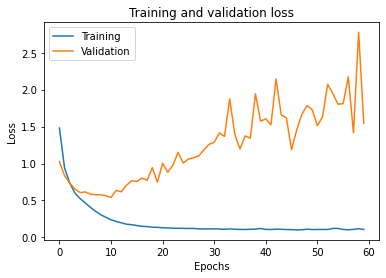

In [ ]:
plt.plot(M.history['loss'], label = 'Training')
plt.plot(M.history['val_loss'], label = 'Validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('LSTM_loss', dpi = 500)
plt.show()

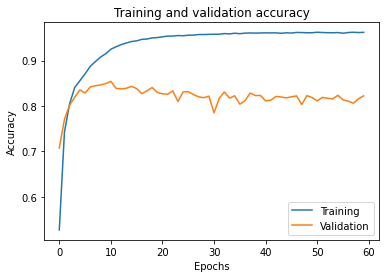

In [ ]:
plt.plot(M.history['accuracy'], label = 'Training')
plt.plot(M.history['val_accuracy'], label = 'Validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('LSTM_accuracy', dpi = 500)
plt.show()

In [ ]:
accu = model.evaluate(test_sequences_matrix, ytest)

475/475 [==============================] - 40s 83ms/step - loss: 1.5746 - accuracy: 0.8271


In [ ]:
y_predl = np.argmax(model.predict(test_sequences_matrix), axis = -1)
confusion_matrix(ytest, y_predl)

array([[ 922,    3,   22,    0,    7,    5,   14,    2,    1,   19,    4,
           8],
       [   3,  188,    9,    0,   10,  138,    7,    4,   20,   10,    7,
          27],
       [  31,    9, 1078,    2,   25,   17,   23,    9,    7,  154,    4,
          13],
       [   1,    1,    2,  431,    7,    4,    8,    6,   15,   42,   27,
           2],
       [   4,   10,    9,    2, 1603,   37,   55,    5,   24,  132,   10,
          38],
       [  11,   87,    8,    2,   22, 1327,   11,    7,    6,   30,   27,
          45],
       [  13,    3,    6,    0,   32,   10,  520,    5,   16,   69,    3,
          11],
       [   5,    6,    3,   13,    9,   23,    6,  696,   13,   26,   14,
          10],
       [  12,   20,   16,   16,   60,   33,   58,   15,  939,   83,   15,
          19],
       [  18,    7,   52,   29,  163,   37,   84,   10,   49, 2691,    5,
          29],
       [   3,    1,    2,   14,    6,   25,    3,    5,    6,    4,  389,
           5],
       [   8,    7,  

In [ ]:
print(classification_report(ytest, y_predl))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1007
           1       0.55      0.44      0.49       423
           2       0.89      0.79      0.84      1372
           3       0.85      0.79      0.82       546
           4       0.82      0.83      0.83      1929
           5       0.79      0.84      0.81      1583
           6       0.65      0.76      0.70       688
           7       0.89      0.84      0.87       824
           8       0.85      0.73      0.79      1286
           9       0.82      0.85      0.83      3174
          10       0.76      0.84      0.80       463
          11       0.90      0.94      0.92      1896

    accuracy                           0.83     15191
   macro avg       0.81      0.80      0.80     15191
weighted avg       0.83      0.83      0.83     15191



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(xtrain)
x_test = tfidf.transform(xtest)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_predk = neigh.predict(x_test)
confusion_matrix(ytest, y_predk)

array([[ 411,    4,   29,    1,  486,    8,   15,    9,    7,   26,    4,
           7],
       [   2,   35,    6,    0,  211,  110,    4,    4,   16,   15,    4,
          16],
       [  52,   11,  455,    3,  683,   23,   16,    6,   24,   83,    4,
          12],
       [   3,    0,    3,  338,  144,    3,    7,    2,   17,   18,    6,
           5],
       [   4,   11,   19,   10, 1466,   29,   70,    9,   65,  209,    7,
          30],
       [  12,  105,   19,    4,  637,  664,   16,   12,   18,   45,   12,
          39],
       [  13,    3,   11,    7,  295,   12,  213,    4,   27,   87,    4,
          12],
       [   8,    4,    5,    3,  374,    6,    8,  353,   28,   19,   12,
           4],
       [   8,   10,   18,   22,  627,   32,   24,   13,  362,  145,    8,
          17],
       [  27,    9,   79,   16,  834,   49,  108,   14,  156, 1847,    7,
          28],
       [   8,    5,    3,   19,  177,   16,    4,    4,   13,    6,  203,
           5],
       [  20,   15,  

In [ ]:
print(classification_report(ytest, y_predk))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1007
           1       0.17      0.08      0.11       423
           2       0.69      0.33      0.45      1372
           3       0.79      0.62      0.69       546
           4       0.22      0.76      0.34      1929
           5       0.67      0.42      0.52      1583
           6       0.43      0.31      0.36       688
           7       0.80      0.43      0.56       824
           8       0.49      0.28      0.36      1286
           9       0.73      0.58      0.65      3174
          10       0.73      0.44      0.55       463
          11       0.84      0.49      0.62      1896

    accuracy                           0.48     15191
   macro avg       0.61      0.43      0.48     15191
weighted avg       0.62      0.48      0.51     15191



In [ ]:
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(x_train, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_predlg = lg.predict(x_test)
confusion_matrix(ytest, y_predlg)

array([[ 858,    4,   48,    0,   22,    5,    9,    9,   10,   31,    0,
          11],
       [   4,  157,   12,    1,   15,  158,    1,    7,   31,   11,    4,
          22],
       [  46,    7, 1056,    7,   37,   28,   10,   16,   24,  129,    0,
          12],
       [   0,    1,    3,  433,   12,    9,    4,    9,   26,   32,   15,
           2],
       [  23,   17,   33,    6, 1364,   41,   37,   28,   67,  244,   15,
          54],
       [  13,   78,   33,    0,   47, 1294,    1,   12,   21,   35,   14,
          35],
       [  14,    4,   20,    8,  129,   18,  288,   11,   43,  131,    5,
          17],
       [  12,    5,   15,   12,   15,   17,    4,  628,   36,   30,   18,
          32],
       [   8,   23,   13,   11,   83,   44,   21,   11,  928,  109,    7,
          28],
       [  21,    4,   53,   23,  105,   35,   21,   16,   81, 2789,    3,
          23],
       [   9,    6,   13,   15,   18,   33,    2,   18,   12,    9,  324,
           4],
       [  22,   15,  

In [ ]:
print(classification_report(ytest, y_predlg))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1007
           1       0.49      0.37      0.42       423
           2       0.80      0.77      0.78      1372
           3       0.83      0.79      0.81       546
           4       0.72      0.71      0.71      1929
           5       0.75      0.82      0.78      1583
           6       0.72      0.42      0.53       688
           7       0.80      0.76      0.78       824
           8       0.72      0.72      0.72      1286
           9       0.77      0.88      0.82      3174
          10       0.78      0.70      0.74       463
          11       0.87      0.87      0.87      1896

    accuracy                           0.77     15191
   macro avg       0.76      0.72      0.73     15191
weighted avg       0.77      0.77      0.77     15191



In [ ]:
lg.score(x_train, ytrain)

0.85775181040158

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_train, ytrain)

Learning rate set to 0.097564
0:	learn: 2.2699386	total: 21.6s	remaining: 5h 58m 49s
1:	learn: 2.1530623	total: 42.1s	remaining: 5h 50m 3s
2:	learn: 2.0766437	total: 1m 2s	remaining: 5h 47m 51s
3:	learn: 2.0121169	total: 1m 23s	remaining: 5h 46m 48s
4:	learn: 1.9603358	total: 1m 44s	remaining: 5h 45m 40s
5:	learn: 1.9064500	total: 2m 4s	remaining: 5h 44m 34s
6:	learn: 1.8599243	total: 2m 25s	remaining: 5h 43m 27s
7:	learn: 1.8163870	total: 2m 45s	remaining: 5h 42m 32s
8:	learn: 1.7829235	total: 3m 6s	remaining: 5h 41m 54s
9:	learn: 1.7574104	total: 3m 26s	remaining: 5h 41m 31s
10:	learn: 1.7289161	total: 3m 47s	remaining: 5h 40m 54s
11:	learn: 1.6953312	total: 4m 7s	remaining: 5h 40m 14s
12:	learn: 1.6669501	total: 4m 28s	remaining: 5h 39m 56s
13:	learn: 1.6477069	total: 4m 49s	remaining: 5h 39m 42s
14:	learn: 1.6264363	total: 5m 9s	remaining: 5h 39m 11s
15:	learn: 1.6070614	total: 5m 30s	remaining: 5h 38m 38s
16:	learn: 1.5890745	total: 5m 50s	remaining: 5h 38m 14s
17:	learn: 1.566078

In [ ]:
y_predc = cat.predict(x_test)
confusion_matrix(ytest, y_predc)

array([[ 844,    3,   50,    1,   26,    5,    6,   15,    9,   32,    4,
          12],
       [   4,  129,   14,    2,   17,  177,    0,    2,   36,   13,    4,
          25],
       [  65,    5, 1032,    5,   45,   29,    8,   21,   25,  122,    0,
          15],
       [   2,    2,    2,  423,   11,   10,    1,   10,   31,   34,   20,
           0],
       [  19,   17,   47,   10, 1368,   35,   33,   25,   80,  221,   17,
          57],
       [  21,   55,   37,    0,   56, 1277,    2,   13,   24,   40,   13,
          45],
       [  20,    8,   16,   14,  140,   23,  256,   13,   38,  134,    6,
          20],
       [  18,    3,   20,   12,   16,   30,    8,  593,   44,   34,   14,
          32],
       [   9,   24,   22,   17,   97,   43,   16,   14,  900,  107,   10,
          27],
       [  19,    2,   73,   30,  141,   30,   17,   24,   82, 2723,    2,
          31],
       [   7,    1,   20,   20,   19,   32,    1,   17,   15,   11,  316,
           4],
       [  28,   13,  

In [ ]:
print(classification_report(ytest, y_predc))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1007
           1       0.49      0.30      0.38       423
           2       0.76      0.75      0.76      1372
           3       0.79      0.77      0.78       546
           4       0.69      0.71      0.70      1929
           5       0.73      0.81      0.77      1583
           6       0.74      0.37      0.49       688
           7       0.78      0.72      0.75       824
           8       0.69      0.70      0.70      1286
           9       0.77      0.86      0.81      3174
          10       0.76      0.68      0.72       463
          11       0.86      0.86      0.86      1896

    accuracy                           0.76     15191
   macro avg       0.74      0.70      0.71     15191
weighted avg       0.75      0.76      0.75     15191



In [ ]:
cat.score(x_train, ytrain)

0.7795918367346939

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
y_preda = ada.predict(x_test)
confusion_matrix(ytest, y_preda)

array([[ 808,    3,   84,    2,   25,    9,    6,   18,    8,   23,    3,
          18],
       [   9,  199,   16,    4,   18,  101,    3,    5,   21,   10,    4,
          33],
       [ 392,   22,  518,   17,   67,   79,   10,   28,   24,  147,    8,
          60],
       [   5,    3,    6,  326,   53,   17,    6,   23,   37,   44,   23,
           3],
       [  84,   48,   54,   29,  872,  129,   65,   42,   94,  321,   34,
         157],
       [  36,  187,   44,   15,   98,  918,    3,   34,   44,   45,   49,
         110],
       [  36,   18,   28,   43,  156,   32,   91,   21,   39,  161,   12,
          51],
       [  46,   14,   48,   13,   41,   53,    2,  426,   42,   83,   14,
          42],
       [  46,   46,   65,   43,  180,   82,   19,   33,  441,  249,   33,
          49],
       [  75,    9,  100,   57,  156,   59,   14,   56,  114, 2447,    4,
          83],
       [  15,   41,    9,   27,   68,   53,    4,   24,   24,   15,  169,
          14],
       [  56,   29,  

In [ ]:
print(classification_report(ytest, y_preda))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62      1007
           1       0.32      0.47      0.38       423
           2       0.52      0.38      0.44      1372
           3       0.56      0.60      0.58       546
           4       0.49      0.45      0.47      1929
           5       0.55      0.58      0.57      1583
           6       0.40      0.13      0.20       688
           7       0.54      0.52      0.53       824
           8       0.49      0.34      0.40      1286
           9       0.68      0.77      0.72      3174
          10       0.46      0.37      0.41       463
          11       0.70      0.75      0.72      1896

    accuracy                           0.57     15191
   macro avg       0.52      0.51      0.50     15191
weighted avg       0.56      0.57      0.56     15191



In [ ]:
ada.score(x_train, ytrain)

0.5680052666227782

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 1000)
xgb.fit(x_train, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_predx = xgb.predict(x_test)
confusion_matrix(ytest, y_predx)

array([[ 859,    4,   40,    1,   26,    6,   11,    9,    9,   27,    3,
          12],
       [   7,  160,   12,    0,   16,  152,    1,    6,   32,    9,    5,
          23],
       [  41,    8, 1089,    4,   35,   19,   13,   14,   19,  121,    0,
           9],
       [   0,    2,    5,  442,    5,    7,    2,    9,   26,   35,   13,
           0],
       [  17,   18,   39,    6, 1370,   38,   41,   28,   67,  234,   17,
          54],
       [  13,   96,   34,    0,   53, 1255,    4,   12,   22,   40,   16,
          38],
       [  16,    8,   16,   11,  117,   20,  305,    8,   45,  119,    6,
          17],
       [  11,    6,   15,    9,   16,   14,    7,  646,   32,   28,   12,
          28],
       [   8,   22,   18,   15,   76,   44,   20,   11,  932,  108,   10,
          22],
       [  22,    4,   71,   27,  143,   34,   34,   18,   79, 2716,    2,
          24],
       [   9,    5,   16,   13,   15,   30,    4,   13,   12,    7,  335,
           4],
       [  25,   20,  

In [ ]:
print(classification_report(ytest, y_predx))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1007
           1       0.45      0.38      0.41       423
           2       0.79      0.79      0.79      1372
           3       0.83      0.81      0.82       546
           4       0.72      0.71      0.71      1929
           5       0.75      0.79      0.77      1583
           6       0.69      0.44      0.54       688
           7       0.81      0.78      0.80       824
           8       0.73      0.72      0.73      1286
           9       0.78      0.86      0.82      3174
          10       0.78      0.72      0.75       463
          11       0.88      0.87      0.87      1896

    accuracy                           0.77     15191
   macro avg       0.75      0.73      0.74     15191
weighted avg       0.77      0.77      0.77     15191



In [ ]:
xgb.score(x_train, ytrain)

0.8836899275839368

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mNB = MultinomialNB(alpha = 0.01)
mNB.fit(x_train, ytrain)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [ ]:
y_predm = mNB.predict(x_test)
confusion_matrix(ytest, y_predm)

array([[ 787,    2,   67,    1,   25,    5,   13,   37,    7,   50,    3,
          10],
       [   3,  111,   13,    0,   19,  198,    0,    2,   33,   26,    3,
          15],
       [ 107,    4,  980,    3,   36,   15,    7,   24,   13,  181,    0,
           2],
       [   2,    1,    2,  373,   25,   10,    5,    7,   33,   73,   12,
           3],
       [  23,   17,   66,    6, 1222,   44,   30,   33,   63,  352,   15,
          58],
       [  15,   36,   59,    0,   66, 1227,    4,   26,   16,  101,   12,
          21],
       [  20,   11,   22,   14,  108,   12,  225,   13,   29,  222,    1,
          11],
       [   7,    5,   11,    3,   17,   25,    5,  601,   41,   67,   15,
          27],
       [   6,   26,   17,   17,  120,   47,   25,   39,  705,  248,   13,
          23],
       [  30,    3,   61,   19,  153,   20,   20,   20,   50, 2780,    2,
          16],
       [   7,    0,   14,    7,   30,   25,    3,   13,   30,   17,  313,
           4],
       [  37,   10,  

In [ ]:
print(classification_report(ytest, y_predm))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1007
           1       0.49      0.26      0.34       423
           2       0.73      0.71      0.72      1372
           3       0.84      0.68      0.75       546
           4       0.66      0.63      0.65      1929
           5       0.73      0.78      0.75      1583
           6       0.66      0.33      0.44       688
           7       0.72      0.73      0.73       824
           8       0.69      0.55      0.61      1286
           9       0.66      0.88      0.76      3174
          10       0.78      0.68      0.72       463
          11       0.89      0.85      0.87      1896

    accuracy                           0.72     15191
   macro avg       0.72      0.65      0.68     15191
weighted avg       0.72      0.72      0.71     15191



In [ ]:
mNB.score(x_train, ytrain)

0.7847267939433838

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(max_iter = 1000)
nnc.fit(x_train, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_predM = nnc.predict(x_test)
confusion_matrix(ytest, y_predM)

array([[ 793,    5,   68,    2,   33,   11,   13,   11,    4,   34,    6,
          27],
       [   8,  118,   13,    1,   39,  140,    9,    8,   37,   17,    8,
          25],
       [  46,   12,  985,    8,   71,   41,   24,   18,   20,  115,    5,
          27],
       [   5,    1,    2,  433,   15,    7,    5,   11,   24,   32,    8,
           3],
       [  13,   16,   53,   11, 1306,   50,   86,   14,   98,  211,   11,
          60],
       [  18,   99,   58,    2,   83, 1115,   18,   16,   31,   50,   25,
          68],
       [  27,    3,   22,   17,  133,   17,  275,   14,   51,  101,    7,
          21],
       [  14,    3,   18,   11,   25,   27,   19,  600,   34,   25,   17,
          31],
       [   9,   20,   30,   19,  121,   47,   27,   17,  842,  112,   16,
          26],
       [  32,    6,   92,   24,  259,   46,   83,   31,  102, 2448,    3,
          48],
       [   4,    3,   13,   17,   28,   25,   10,   16,   26,    9,  305,
           7],
       [  27,   18,  

In [ ]:
print(classification_report(ytest, y_predM))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1007
           1       0.39      0.28      0.32       423
           2       0.71      0.72      0.71      1372
           3       0.79      0.79      0.79       546
           4       0.60      0.68      0.64      1929
           5       0.71      0.70      0.71      1583
           6       0.47      0.40      0.43       688
           7       0.77      0.73      0.75       824
           8       0.65      0.65      0.65      1286
           9       0.76      0.77      0.77      3174
          10       0.72      0.66      0.69       463
          11       0.82      0.84      0.83      1896

    accuracy                           0.71     15191
   macro avg       0.68      0.67      0.67     15191
weighted avg       0.71      0.71      0.71     15191



In [ ]:
nnc.score(x_train, ytrain)

0.9630842659644503

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predS = svc.predict(x_test)
confusion_matrix(ytest, y_predS)

array([[ 876,    3,   34,    1,   19,    7,   10,   11,    6,   29,    3,
           8],
       [   3,  131,   14,    1,   26,  173,    1,    4,   30,   17,    3,
          20],
       [  33,    2, 1114,    1,   33,   25,   10,   14,   20,  118,    0,
           2],
       [   2,    0,    1,  465,    6,    6,    4,    9,   16,   23,   14,
           0],
       [  15,   13,   42,    9, 1389,   44,   38,   21,   75,  225,   12,
          46],
       [  16,   54,   35,    2,   54, 1291,    6,   22,   17,   52,   13,
          21],
       [  17,    6,   18,   17,  129,   19,  292,    7,   42,  126,    4,
          11],
       [  11,    4,    9,    7,   16,   19,    6,  658,   28,   23,   16,
          27],
       [  10,   24,   24,   22,   98,   37,   20,   17,  892,  104,   15,
          23],
       [  26,    5,   52,   22,  135,   24,   33,   20,   76, 2758,    3,
          20],
       [   7,    2,   17,   15,   16,   27,    1,   10,   17,    6,  343,
           2],
       [  29,   10,  

In [ ]:
print(classification_report(ytest, y_predS))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1007
           1       0.52      0.31      0.39       423
           2       0.81      0.81      0.81      1372
           3       0.82      0.85      0.83       546
           4       0.71      0.72      0.71      1929
           5       0.75      0.82      0.78      1583
           6       0.69      0.42      0.53       688
           7       0.81      0.80      0.81       824
           8       0.73      0.69      0.71      1286
           9       0.78      0.87      0.82      3174
          10       0.79      0.74      0.76       463
          11       0.90      0.88      0.89      1896

    accuracy                           0.78     15191
   macro avg       0.76      0.73      0.74     15191
weighted avg       0.78      0.78      0.78     15191



In [ ]:
svc.score(x_train, ytrain)

0.9027649769585253

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ex = ExtraTreesClassifier()
ex.fit(x_train, ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
y_prede = ex.predict(x_test)
confusion_matrix(ytest, y_prede)

array([[ 814,    1,   47,    0,   31,    6,    8,    9,    2,   74,    3,
          12],
       [   3,   27,   16,    0,   30,  214,    2,    4,   50,   35,    3,
          39],
       [  64,    8, 1012,    0,   27,   15,    3,    7,   13,  212,    1,
          10],
       [   1,    0,    3,  319,   23,   15,    1,    5,   25,  138,   11,
           5],
       [  22,    6,   52,    2, 1160,   52,   30,   13,   42,  478,    3,
          69],
       [  17,   68,   62,    0,   62, 1146,    5,   10,   13,  130,    8,
          62],
       [  14,    1,   29,    6,  142,   25,  117,   12,   33,  293,    2,
          14],
       [  11,    0,   28,    4,   26,   40,    3,  488,   25,  153,    5,
          41],
       [  10,    8,   21,    9,  146,   58,    7,   12,  605,  370,    6,
          34],
       [  26,    3,   49,    3,  138,   24,   40,    3,   43, 2818,    1,
          26],
       [   6,    6,   23,    6,   31,   39,    0,   10,   25,   37,  265,
          15],
       [  43,   12,  

In [ ]:
print(classification_report(ytest, y_prede))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1007
           1       0.19      0.06      0.10       423
           2       0.74      0.74      0.74      1372
           3       0.91      0.58      0.71       546
           4       0.63      0.60      0.61      1929
           5       0.68      0.72      0.70      1583
           6       0.53      0.17      0.26       688
           7       0.83      0.59      0.69       824
           8       0.68      0.47      0.56      1286
           9       0.59      0.89      0.71      3174
          10       0.84      0.57      0.68       463
          11       0.83      0.85      0.84      1896

    accuracy                           0.68     15191
   macro avg       0.69      0.59      0.62     15191
weighted avg       0.69      0.68      0.67     15191



In [ ]:
ex.score(x_train, ytrain)

0.9633475971033575

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predr = rfc.predict(x_test)
confusion_matrix(ytest, y_predr)

array([[ 795,    1,   52,    0,   39,    7,    8,    7,    6,   75,    3,
          14],
       [   5,   17,   14,    0,   28,  232,    3,    3,   52,   37,    4,
          28],
       [  59,    7,  996,    0,   36,   18,    2,    8,   14,  223,    1,
           8],
       [   1,    0,    4,  299,   32,   16,    0,    9,   34,  129,   16,
           6],
       [  20,    4,   38,    3, 1177,   49,   27,    9,   52,  466,    7,
          77],
       [  13,   66,   60,    0,   70, 1147,    5,    3,   19,  125,    7,
          68],
       [  14,    2,   34,    1,  171,   21,   91,    6,   27,  299,    3,
          19],
       [  17,    0,   34,    2,   39,   48,    1,  432,   32,  160,    5,
          54],
       [   4,    3,   30,    5,  153,   67,    6,    6,  587,  382,    5,
          38],
       [  21,    2,   43,    2,  142,   24,   40,    5,   49, 2815,    2,
          29],
       [   6,    5,   18,    4,   35,   58,    0,    9,   25,   45,  243,
          15],
       [  37,   11,  

In [ ]:
print(classification_report(ytest, y_predr))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1007
           1       0.14      0.04      0.06       423
           2       0.73      0.73      0.73      1372
           3       0.94      0.55      0.69       546
           4       0.60      0.61      0.60      1929
           5       0.66      0.72      0.69      1583
           6       0.48      0.13      0.21       688
           7       0.86      0.52      0.65       824
           8       0.65      0.46      0.54      1286
           9       0.58      0.89      0.70      3174
          10       0.80      0.52      0.63       463
          11       0.82      0.85      0.83      1896

    accuracy                           0.67     15191
   macro avg       0.67      0.57      0.59     15191
weighted avg       0.67      0.67      0.65     15191



In [ ]:
rfc.score(x_train, ytrain)

0.9633475971033575

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, ytrain)
y_predd = clf.predict(x_test)
confusion_matrix(ytest, y_predd)

array([[ 688,    5,  111,    3,   43,   19,   29,   21,   12,   41,   11,
          24],
       [   6,   99,   21,    1,   37,  142,   10,   12,   38,   19,   13,
          25],
       [ 109,   16,  764,   22,   85,   57,   35,   43,   40,  151,   12,
          38],
       [   8,    4,   11,  308,   23,   14,   18,   23,   37,   60,   27,
          13],
       [  45,   25,   74,   20, 1016,   72,  140,   58,  113,  242,   39,
          85],
       [  25,  157,   59,   12,  112,  932,   24,   25,   57,   59,   40,
          81],
       [  23,   11,   32,   14,  154,   21,  165,   32,   56,  129,   16,
          35],
       [  23,    9,   50,   27,   47,   49,   26,  372,   75,   64,   26,
          56],
       [  26,   38,   58,   45,  156,   86,   60,   51,  510,  185,   31,
          40],
       [  46,   19,  134,   39,  303,   78,  127,   69,  195, 2084,   13,
          67],
       [   7,   16,   24,   33,   41,   44,    7,   26,   28,   14,  200,
          23],
       [  35,   50,  

In [ ]:
print(classification_report(ytest, y_predd))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1007
           1       0.22      0.23      0.23       423
           2       0.55      0.56      0.55      1372
           3       0.58      0.56      0.57       546
           4       0.48      0.53      0.50      1929
           5       0.58      0.59      0.59      1583
           6       0.24      0.24      0.24       688
           7       0.48      0.45      0.46       824
           8       0.42      0.40      0.41      1286
           9       0.67      0.66      0.66      3174
          10       0.45      0.43      0.44       463
          11       0.73      0.71      0.72      1896

    accuracy                           0.56     15191
   macro avg       0.51      0.50      0.50     15191
weighted avg       0.56      0.56      0.56     15191



In [ ]:
clf.score(x_train, ytrain)

0.9633475971033575

In [ ]:
from sklearn.linear_model import LogisticRegression
CLF = LogisticRegression(max_iter = 500)
CLF.fit(x_train, ytrain)
y_predL = CLF.predict(x_test)
confusion_matrix(ytest, y_predL)

array([[ 857,    2,   44,    2,   20,    9,   11,   10,    7,   27,    3,
          15],
       [   4,  135,   12,    1,   29,  168,    0,    5,   29,   15,    3,
          22],
       [  39,    4, 1074,    2,   38,   27,    9,   17,   23,  136,    0,
           3],
       [   1,    1,    2,  433,   11,    5,    3,   10,   27,   40,   12,
           1],
       [  19,    7,   44,   11, 1369,   44,   39,   29,   82,  223,   16,
          46],
       [  10,   54,   37,    3,   53, 1282,    6,   24,   23,   54,   14,
          23],
       [  19,    6,   18,   22,  109,   21,  293,   10,   47,  125,    6,
          12],
       [   8,    2,   13,    6,   18,   20,    8,  644,   33,   30,   14,
          28],
       [  11,   17,   26,   20,  108,   40,   20,   19,  873,  109,   14,
          29],
       [  29,    3,   67,   20,  157,   24,   34,   14,   82, 2721,    2,
          21],
       [   7,    4,   16,   14,   21,   30,    1,   14,   20,    9,  324,
           3],
       [  28,    7,  

In [ ]:
print(classification_report(ytest, y_predL))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1007
           1       0.56      0.32      0.41       423
           2       0.78      0.78      0.78      1372
           3       0.80      0.79      0.80       546
           4       0.69      0.71      0.70      1929
           5       0.75      0.81      0.78      1583
           6       0.69      0.43      0.53       688
           7       0.78      0.78      0.78       824
           8       0.69      0.68      0.69      1286
           9       0.77      0.86      0.81      3174
          10       0.78      0.70      0.74       463
          11       0.89      0.87      0.88      1896

    accuracy                           0.77     15191
   macro avg       0.75      0.71      0.73     15191
weighted avg       0.76      0.77      0.76     15191



In [ ]:
CLF.score(x_train, ytrain)

0.8040816326530612

In [ ]:
from sklearn.linear_model import SGDClassifier
Clf = SGDClassifier()
Clf.fit(x_train, ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_preds = Clf.predict(x_test)
confusion_matrix(ytest, y_preds)

array([[ 869,    1,   39,    4,   15,    6,    8,   12,    8,   30,    3,
          12],
       [   5,   77,   17,    2,   20,  206,    0,    5,   38,   21,    7,
          25],
       [  53,    1, 1038,    7,   32,   26,    6,   21,   27,  156,    1,
           4],
       [   2,    1,    1,  429,   11,    7,    1,   10,   25,   41,   17,
           1],
       [  24,    7,   43,   16, 1327,   43,   16,   24,   76,  276,   21,
          56],
       [  18,   12,   49,    2,   47, 1306,    2,   25,   19,   55,   17,
          31],
       [  22,    2,   20,   27,  116,   26,  232,   11,   46,  167,    6,
          13],
       [  13,    3,   20,    9,    9,   26,    5,  608,   36,   43,   17,
          35],
       [  13,   11,   25,   23,  120,   44,   17,   22,  822,  139,   16,
          34],
       [  34,    1,   51,   20,  106,   25,   13,   21,   78, 2801,    4,
          20],
       [   9,    0,   17,   13,   21,   27,    2,    8,   24,   10,  326,
           6],
       [  41,    4,  

In [ ]:
print(classification_report(ytest, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1007
           1       0.64      0.18      0.28       423
           2       0.77      0.76      0.76      1372
           3       0.77      0.79      0.78       546
           4       0.72      0.69      0.70      1929
           5       0.73      0.83      0.77      1583
           6       0.76      0.34      0.47       688
           7       0.78      0.74      0.76       824
           8       0.68      0.64      0.66      1286
           9       0.74      0.88      0.81      3174
          10       0.73      0.70      0.72       463
          11       0.87      0.87      0.87      1896

    accuracy                           0.76     15191
   macro avg       0.75      0.69      0.70     15191
weighted avg       0.75      0.76      0.75     15191



In [ ]:
Clf.score(x_train, ytrain)

0.7785385121790652